In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [78]:
df=pd.read_csv("CarPrice_Assignment.csv")
df.head()
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [79]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [80]:
df.shape

(205, 26)

In [81]:
x=np.asarray(df[['enginesize']]).reshape(-1,1)
y=np.asarray(df[['price']]).reshape(-1,1)
print("dataset preview:")
print(df.head())
print(x)

dataset preview:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  p

In [82]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x)
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y)

LinearRegression()

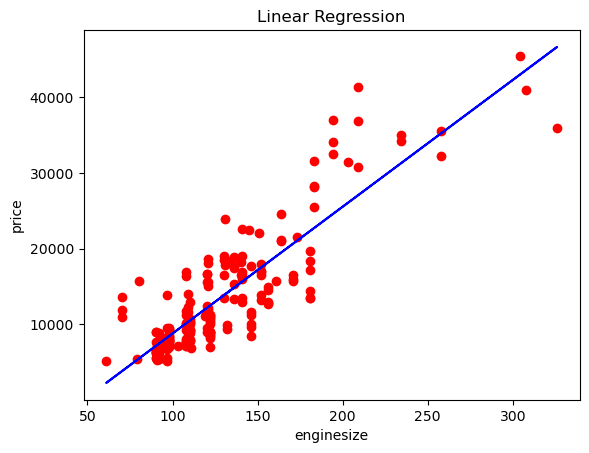

In [83]:
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg.predict(x),color='blue')
plt.title("Linear Regression")
plt.xlabel("enginesize")
plt.ylabel("price")
plt.show()

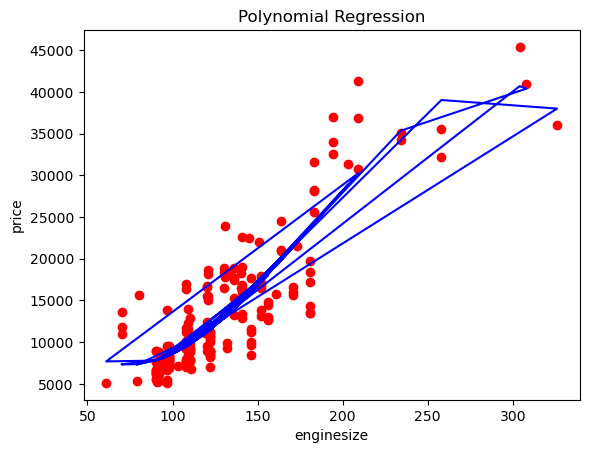

In [84]:
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg2.predict(x_poly),color='blue')
plt.title("Polynomial Regression")
plt.xlabel("enginesize")
plt.ylabel("price")
plt.show()

C:\Users\charm\AppData\Local\Temp\ipykernel_11580\2150548876.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid=np.arange(min(x),max(x),0.1)


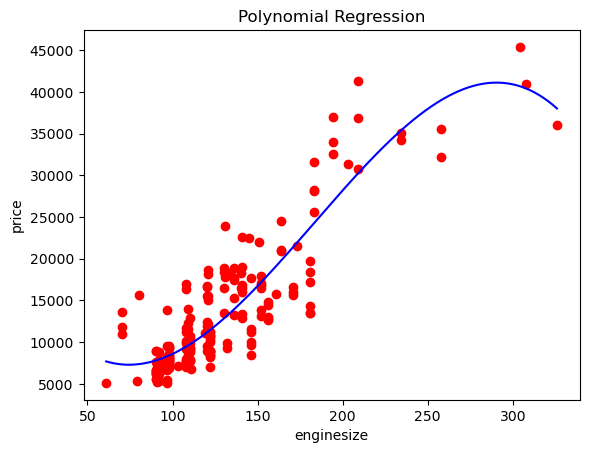

In [85]:
x_grid=np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color='red')
plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
plt.title("Polynomial Regression")
plt.xlabel("enginesize")      
plt.ylabel("price")
plt.show()

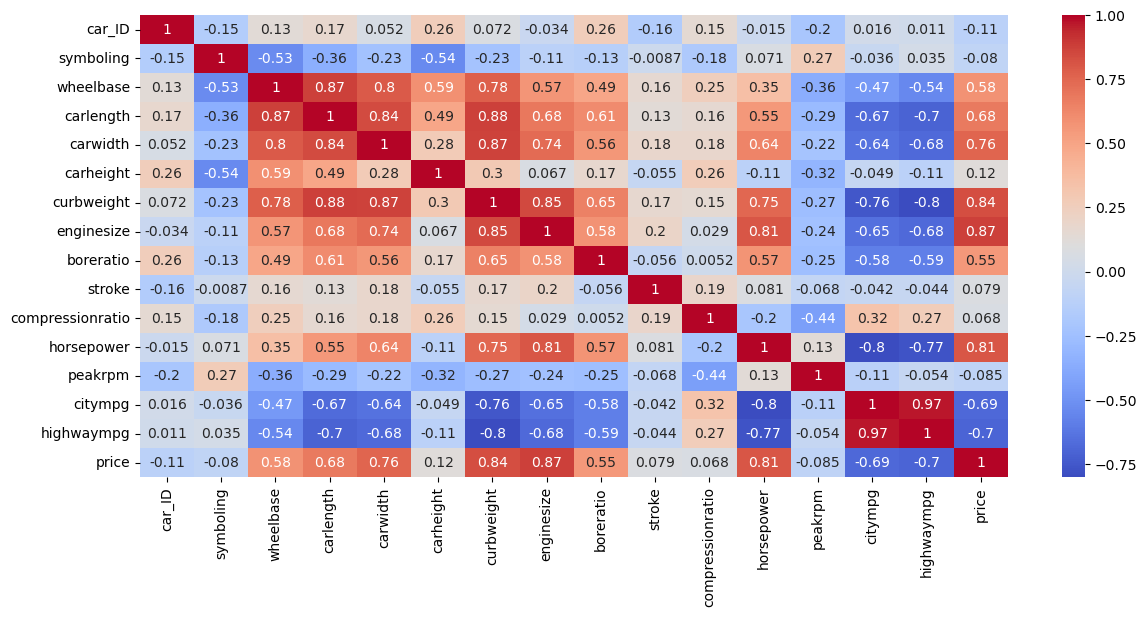

In [86]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

In [87]:
coee_mat=df.corr(numeric_only=True)
tar = coee_mat['price']
print(tar)

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64


In [110]:
for col, val in tar.items():
    if col == 'price':
        continue

    abs_val = abs(val)

    if val > 0:
        if abs_val < 0.1:
            print("very weak +ve", col, val)
        elif abs_val < 0.3:
            print("weak +ve", col, val)
        elif abs_val < 0.7:
            print("moderate +ve", col, val)
        else:
            print("strong +ve", col, val)
    else:
        if abs_val < 0.1:
            print("very weak -ve", col, val)
        elif abs_val < 0.3:
            print("weak -ve", col, val)
        elif abs_val < 0.7:
            print("moderate -ve", col, val)
        else:
            print("strong -ve", col, val)


weak -ve car_ID -0.10909333948229938
very weak -ve symboling -0.07997822464270359
moderate +ve wheelbase 0.5778155982921489
moderate +ve carlength 0.6829200156779629
strong +ve carwidth 0.759325299741511
weak +ve carheight 0.11933622657049496
strong +ve curbweight 0.8353048793372975
strong +ve enginesize 0.8741448025245117
moderate +ve boreratio 0.5531732367984439
very weak +ve stroke 0.0794430838819307
very weak +ve compressionratio 0.06798350579944266
strong +ve horsepower 0.8081388225362214
very weak -ve peakrpm -0.0852671502778575
moderate -ve citympg -0.68575133602704
moderate -ve highwaympg -0.6975990916465573


In [89]:
# Predicting a new result with Linear Regression
linear_prediction = lin_reg.predict([[200]])
print("Linear Regression Prediction for Level 200:", linear_prediction)

# Predicting a new result with Polynomial Regression
poly_prediction = lin_reg2.predict(poly_reg.fit_transform([[200]]))
print("Polynomial Regression Prediction for Level 200:", poly_prediction)

Linear Regression Prediction for Level 200: [[25534.23774749]]
Polynomial Regression Prediction for Level 200: [[28205.13188824]]


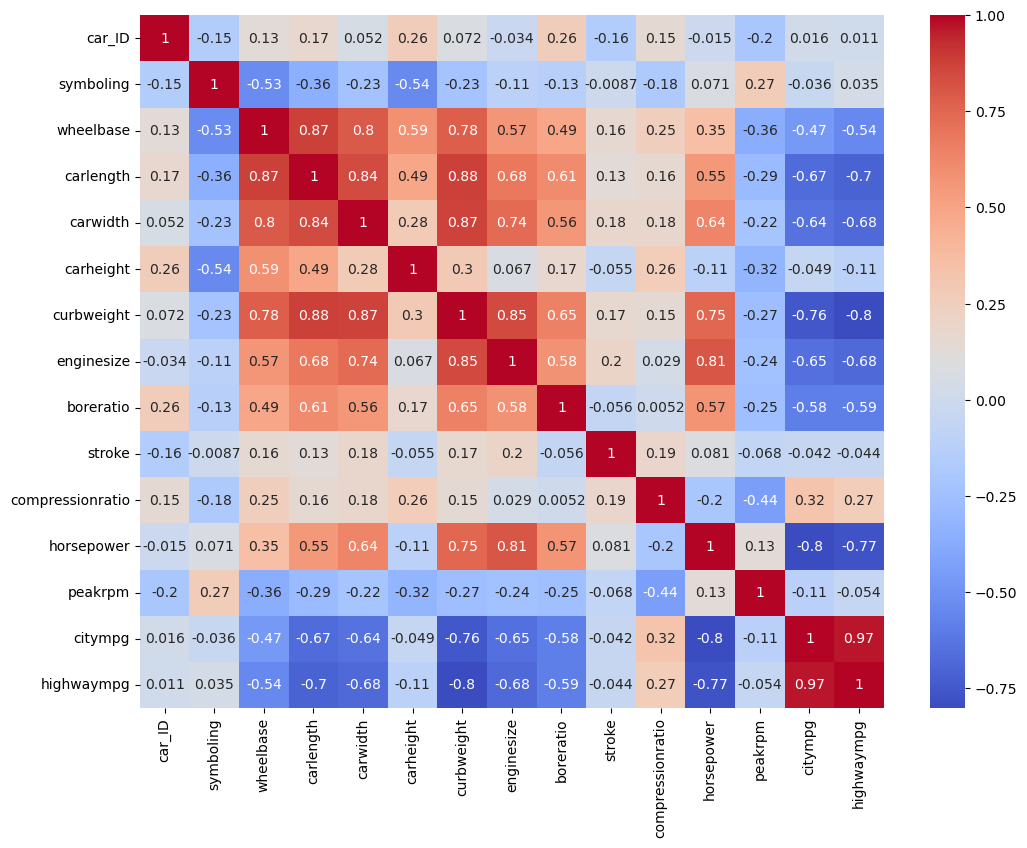

In [90]:
x=df.drop('price',axis=1)
 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()

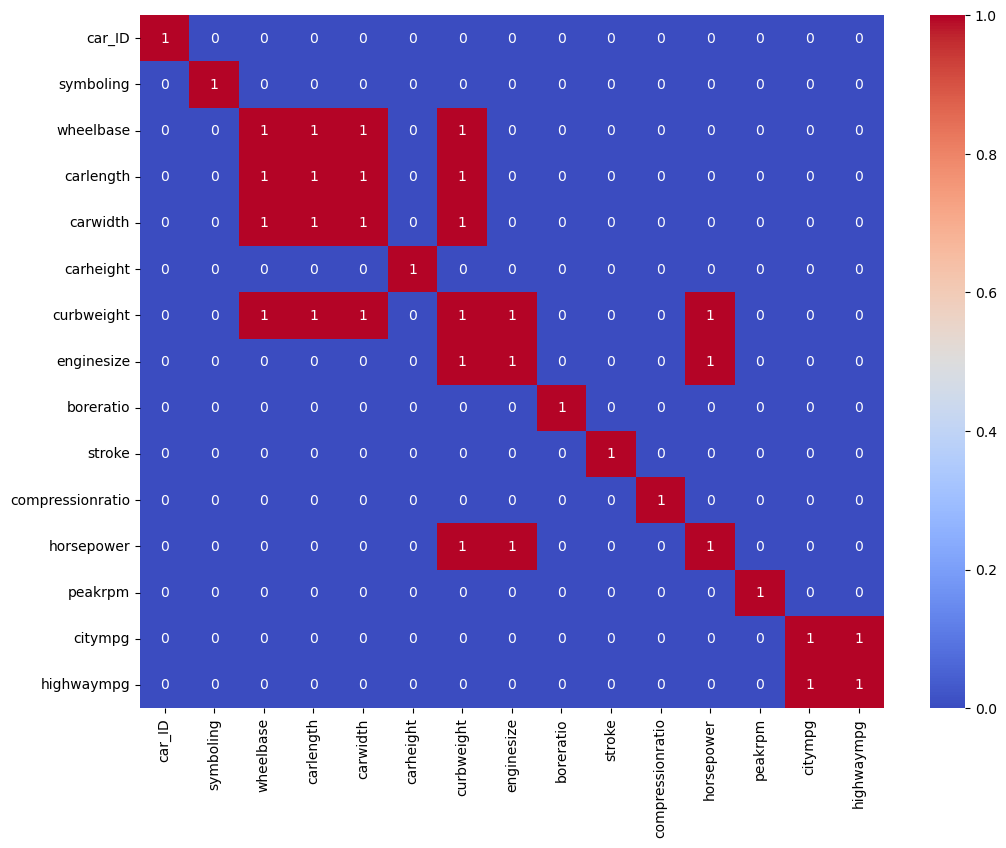

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True)>0.75, annot=True,cmap='coolwarm')
plt.show()

In [102]:
corr_matrix = df.corr(numeric_only=True)
target_matrix = corr_matrix['price']
low_corr = []
moderate_corr = []
high_corr = []

for feature, corr_value in target_matrix.items():
    
    if feature == 'price':
        continue
    
    abs_corr = abs(corr_value)
    
    if abs_corr < 0.3:
        low_corr.append((feature, corr_value))
        
    elif 0.3 <= abs_corr <= 0.7:
        moderate_corr.append((feature, corr_value))
        
    else:
        high_corr.append((feature, corr_value))



In [106]:
print("low correlation:")
for i,val in low_corr:
    print(i,",",val)
print("medium correlation:")
for i,val in moderate_corr:
    print(i,",",val)
print("high correlation:")
for i,val in high_corr:
    print(i,",",val)

low correlation:
car_ID , -0.10909333948229938
symboling , -0.07997822464270359
carheight , 0.11933622657049496
stroke , 0.0794430838819307
compressionratio , 0.06798350579944266
peakrpm , -0.0852671502778575
medium correlation:
wheelbase , 0.5778155982921489
carlength , 0.6829200156779629
boreratio , 0.5531732367984439
citympg , -0.68575133602704
highwaympg , -0.6975990916465573
high correlation:
carwidth , 0.759325299741511
curbweight , 0.8353048793372975
enginesize , 0.8741448025245117
horsepower , 0.8081388225362214


In [ ]:
corr_matrix = x.corr(numeric_only=True)
target_matrix = corr_matrix['price'].drop('price')

high_corr_features = target_matrix[abs(target_matrix) > 0.75].index

X = x.drop(columns=high_corr_features)

print("High correlation features dropped:", high_corr_features)
print("New dataset shape:", X.shape)

KeyError: 'price'